In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
t_train = pd.read_csv(r'C:\Users\USER\Desktop\EXTRA\Statistics datasets\train.csv', encoding='unicode_escape')

In [25]:
t_train.shape

(891, 12)

In [10]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
t_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
categorical = t_train.dtypes[t_train.dtypes == "object"].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [20]:
t_train[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [26]:
del t_train["PassengerId"]
# Deleted the PassengerId because it had no relevance to our goal.

In [29]:
t_train['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [38]:
t_train["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [43]:
t_train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

# Transforming the variables

In [45]:
# Transforming the 0 and 1 on the data to "Died" and "Survived" respectively.
new_survived = pd.Categorical(t_train["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

new_survived.describe()
# Descrribing the newly transformed column.

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [48]:
# Transforming and renaming the class column into more suitable form.

new_Pclass = pd.Categorical(t_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["Class1", "Class2", "Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [49]:
t_train["Pclass"] = new_Pclass

In [50]:
t_train["Survived"] = new_survived

In [52]:
t_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Extracting strings from entries.

In [54]:
char_cabin = t_train["Cabin"].astype(str) #Converts data to string.

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Takes first letter from the char_cabin

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [55]:
t_train["Cabin"] = new_Cabin

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

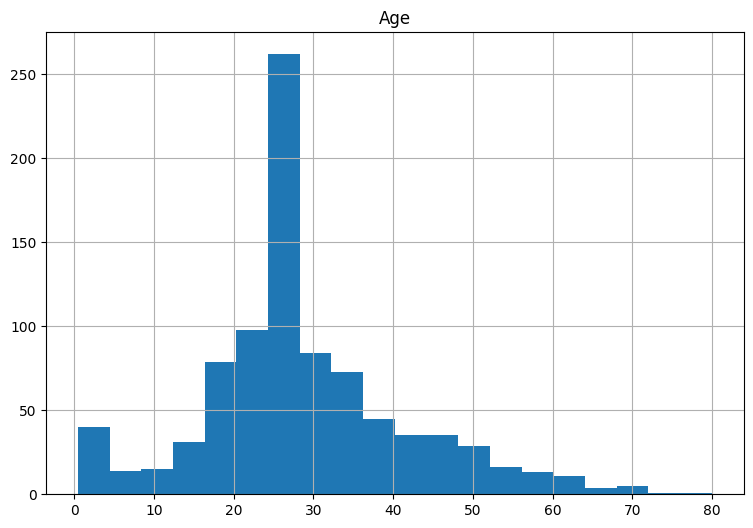

In [58]:
# Making a histogram for the age variable.

t_train.hist("Age", figsize=(9,6), bins=20)

In [59]:
# The majority age group belongs between 25 to 30 so we will replace the missing age data with the median age value.

new_age = np.where(t_train["Age"].isnull(), 28, t_train["Age"])
t_train["Age"] = new_age

t_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

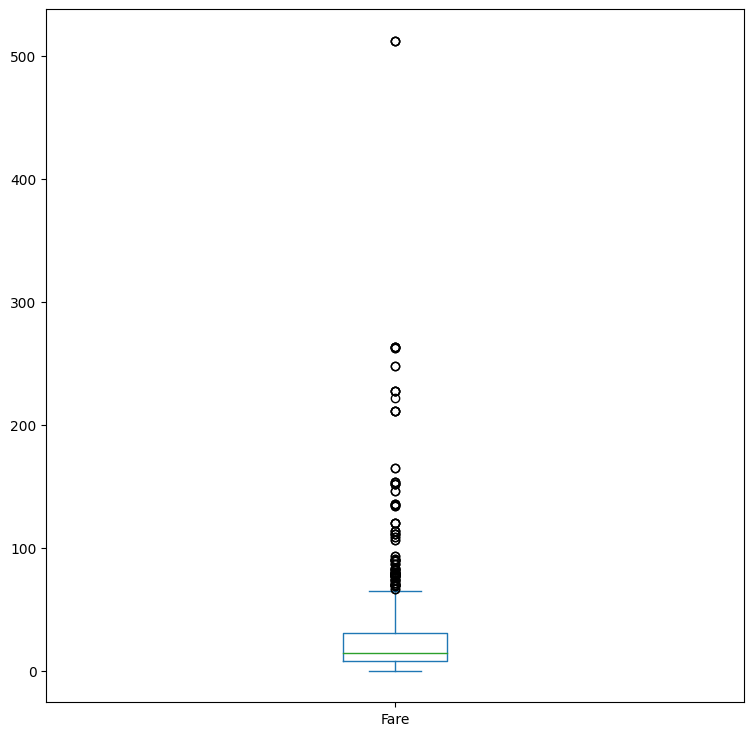

In [60]:
t_train["Fare"].plot(kind="box", figsize=(9,9))

In [62]:
# Locating outliers who paid the highest to get onboard Titanic.
index = np.where(t_train["Fare"] == max(t_train["Fare"]))

t_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Survived,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Survived,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Survived,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


## Creating some new variables.

In [63]:
# Creating a new variable by combining two variables into one.

t_train["Family"] = t_train["SibSp"] + t_train["Parch"]

In [64]:
# Showing data related to the passangers with the most family members on board.
most_family = np.where(t_train["Family"] == max(t_train["Family"]))

t_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Died,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Died,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Died,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Died,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Died,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Died,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Died,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10
